In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/github/whobpyt/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/github/whobpyt


In [4]:
import os
out_dir = '../../wwd-model-fitting/data/HCP/'
base_dir = '../../wwd-model-fitting/data/HCP/'
subs =sorted([sc_file[-10:-4] for sc_file in os.listdir(base_dir) if sc_file[:8] == 'weights_'])


In [5]:
import nmm
import numpy as np
import pandas as pd

In [6]:
from nmm.data.dataload import dataloader
from nmm.models.janse_rit import RNNJANSEN
from nmm.models.wong_wang import RNNRWW
from nmm.datatypes.modelparameters import ParamsModel
from nmm.optmizition.modelfitting import Model_fitting

In [20]:




#subs_s = ['562446', '257542', '154936' ] 

for i in range(0,1):
    
    
    
    node_size = 83
    mask = np.tril_indices(node_size, -1)
    num_epoches = 15
    batch_size = 20
    step_size = 0.05
    input_size = 2
    tr = 0.75
    repeat_size = 5
    sub=subs[i]
    print(i, sub)
    sc_file = base_dir +'weights_'+sub+'.txt'
    ts_file = base_dir +sub+'_rfMRI_REST1_LR_hpc200_clean__l2k8_sc33_ts.pkl'#out_dir+'sub_'+sub+'simBOLD_idt.txt'#
   
    if os.path.isfile(sc_file) and os.path.isfile(ts_file):
        sc = np.loadtxt(sc_file)
        SC =(sc+sc.T)*0.5
       
        sc = np.log1p(SC)/np.linalg.norm(np.log1p(SC))

        

        
        
        ts_pd = pd.read_pickle(ts_file)
        ts = ts_pd.values
        #ts = np.loadtxt(ts_file)
        ts =ts/np.max(ts)
        fc_emp = np.corrcoef(ts.T)
        # Get the WWD model module for forward in a batch. 

        data_mean = dataloader(ts, num_epoches, batch_size)
        
        
        par = ParamsModel('RWW',  g=[100, 1/20], g_EE=[4.5, 1/1], g_EI =[0.4,1/5], g_IE=[0.4,1/5], I_0 =[0.34, 1/20])
                    #, w_bb=[sc, 50 * np.ones((node_size, node_size))])
        model = RNNRWW(node_size, batch_size, step_size, repeat_size, tr, sc, True, par)

        model.setModelParameters()
        
        # call model fit method
        F = Model_fitting(model, data_mean, num_epoches, 2)

        # fit data(train)

        output_train = F.train()

        


0 100307
epoch:  0 -12.6734085
epoch:  0 0.18215836856162615 cos_sim:  -0.004540168622518087
epoch:  1 -13.12398
epoch:  1 0.31978523206250914 cos_sim:  -0.005393825678374394
epoch:  2 -13.37174
epoch:  2 0.3500339293524413 cos_sim:  -0.005152375569468122
epoch:  3 -13.552017
epoch:  3 0.38149187005514557 cos_sim:  -0.005129894058180313
epoch:  4 -13.718971
epoch:  4 0.4016799764479544 cos_sim:  -0.005304217648317472
epoch:  5 -13.934518
epoch:  5 0.4434738829076052 cos_sim:  -0.005128115655105997
epoch:  6 -13.995817
epoch:  6 0.4634043703364982 cos_sim:  -0.005395797276918773
epoch:  7 -14.112072
epoch:  7 0.45769400182990866 cos_sim:  -0.0055511409113737555
epoch:  8 -14.235297
epoch:  8 0.4691222150528334 cos_sim:  -0.004848593144756633
epoch:  9 -14.3258295
epoch:  9 0.4660641386151163 cos_sim:  -0.004975402978521786
epoch:  10 -14.347695
epoch:  10 0.4415911783628325 cos_sim:  -0.00543141627144832
epoch:  11 -14.530803
epoch:  11 0.4582563958288606 cos_sim:  -0.005240858567597969

In [21]:
F.model.state_dict()

OrderedDict([('sup_ca', tensor(0.6711)),
             ('sup_cb', tensor(19.9981)),
             ('sup_cc', tensor(9.8150)),
             ('gains_con',
              tensor([[-0.5879,  0.8015, -0.4013,  ...,  0.0500,  0.0500,  0.0500],
                      [ 0.8015, -0.5844,  0.0500,  ...,  0.0500,  0.0500,  0.0500],
                      [-0.4013,  0.0500, -0.5785,  ...,  0.0500,  0.0500,  0.0500],
                      ...,
                      [ 0.0500,  0.0500,  0.0500,  ..., -0.5771,  0.7991,  0.0500],
                      [ 0.0500,  0.0500,  0.0500,  ...,  0.7991,  0.0500,  0.0500],
                      [ 0.0500,  0.0500,  0.0500,  ...,  0.0500,  0.0500,  0.0500]])),
             ('I_0', tensor(0.4540)),
             ('I_0_m', tensor(0.4534)),
             ('I_0_v_inv', tensor(444.4683)),
             ('g', tensor(100.0527)),
             ('g_m', tensor(100.0527)),
             ('g_v_inv', tensor(442.6701)),
             ('g_EE', tensor(4.5706)),
             ('g_EE_m', tensor

In [7]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import seaborn as sns # for plotting
import time # for timer
import scipy.io

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

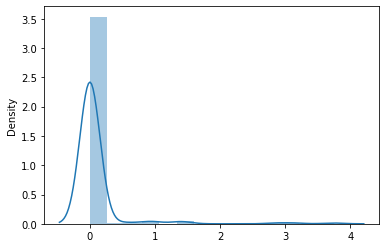

In [8]:
import nibabel as nib


#e_field = nib.load('/content/drive/MyDrive/Model_DLPFC/dlpfc2MNI_masked.nii.gz').get_data()
e_field = nib.load('/content/drive/MyDrive/Model_DLPFC/auditory stimuli_association-test_z_FDR_0.01.nii.gz').get_data()

Schaefer_atlas = nib.load('/content/drive/MyDrive/Model_DLPFC/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.nii.gz').get_data()

stim_weights = np.zeros((200))
for roi in range(1,201):
  x,y,z = np.where(Schaefer_atlas==roi)
  stim_weights[roi-1] = np.mean(e_field[x,y,z])

  
sns.distplot(stim_weights)

In [9]:
#stim_weights = np.load('/content/drive/MyDrive/TORONTO/Model_DLPFC/stim_weight_dlpfc.npy')

url = 'https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Centroid_coordinates/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'
labels = pd.read_csv(url)
labels = labels['ROI Name']

stim_weights_thr = stim_weights.copy()
stim_weights_thr[stim_weights_thr< stim_weights_thr.max() * 0.45] = 0

labels[np.where(stim_weights_thr>0)[0]]

15     7Networks_LH_SomMot_2
115    7Networks_RH_SomMot_1
116    7Networks_RH_SomMot_2
Name: ROI Name, dtype: object

In [10]:
eeg_file = '/content/drive/MyDrive/Work/Sciencing/Data/test_data/data_std_ket-2.mat'
eeg =scipy.io.loadmat(eeg_file)
eeg_data = eeg['data_std_ket']
eeg_data = eeg_data[:,0:64, :128]/3

In [11]:
subs = ['4431', '4446', '4447', '4458', '4482', '4487', '4488', '4548', '4494', '4499', '4500', '4520', '4532', '4497', '4534', '4459', '4507','4422','4478']

In [12]:
sc_file = '/content/drive/MyDrive/Work/Sciencing/Data/EEG/Schaefer2018_200Parcels_7Networks_count.csv'
dist_file = '/content/drive/MyDrive/Work/Sciencing/Data/EEG/Schaefer2018_200Parcels_7Networks_distance.csv'
sc_df = pd.read_csv(sc_file, header=None, sep=' ')
sc = sc_df.values
dist_df = pd.read_csv(dist_file, header=None, sep=' ')
dist = dist_df.values
sc = np.log1p(sc) / np.linalg.norm(np.log1p(sc))

In [13]:
#leadfild = np.load(file_leadfield)
ki0 =stim_weights_thr[:,np.newaxis]

sub:  0
Parameter containing:
tensor([[-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.],
        [-1., -1., -1.,  ..., -1., -1., -1.]], requires_grad=True)
epoch:  0 18336.377
epoch:  0 0.30841094531214686 cos_sim:  0.056422547788636285
epoch:  1 12476.279
epoch:  1 0.25868816583204607 cos_sim:  0.04333247307605129
epoch:  2 9611.31
epoch:  2 0.6163886420138613 cos_sim:  0.19738845939090133
epoch:  3 7770.281
epoch:  3 0.41115070476204857 cos_sim:  0.4340623048035232
epoch:  4 6398.604
epoch:  4 0.4246211047260489 cos_sim:  0.3432642553053886
epoch:  5 5276.3965
epoch:  5 0.5029403237754762 cos_sim:  0.5463136814095747
epoch:  6 4303.4263
epoch:  6 0.6324818387826058 cos_sim:  0.6169923874433876
epoch:  7 3430.462
epoch:  7 0.729170330727731 cos_sim:  0.6942177227050483
epoch:  8 2631.3838
epoch:  8 0.791

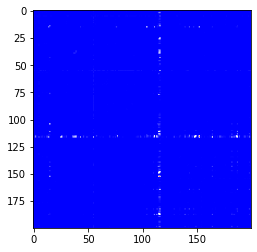

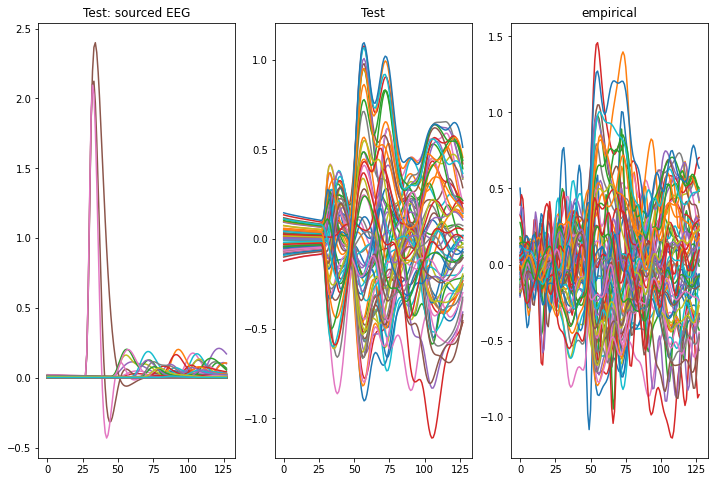

In [14]:
sub = 0
mode = '_dev_ket'

#sc[200:,200:][sc[200:,200:] < sc[200:,200:].mean()+2*sc[200:,200:].std()]=0
#sc[200:,200:][sc[200:,200:] < sc[200:,200:].mean()+2*sc[200:,200:].std()] =0

#sc = np.log1p(sc_matrix)/np.linalg.norm(np.log1p(sc_matrix))

#sc = np.log1p(sc)/np.linalg.norm(np.log1p(sc))



#lm_v = np.zeros((output_size,node_size))


#['gm']:#[0, 1,2,3,5,6,7,8,9,10, 12,13,14,15,16,17,18]:#
#for i in range(data_high['only_high_trial'].shape[0]):
for sub in range(0,1):
    print('sub: ', sub)
    sub2model = subs[sub]
    eeg_sub = eeg_data[sub]
    node_size = stim_weights_thr.shape[0]
    output_size = eeg_sub.shape[0]
    batch_size = 16
    step_size = 0.0001
    input_size = 3
    num_epoches = 120
    tr = 0.0039
    state_size = 6
    base_batch_num = 20
    time_dim = eeg_sub.shape[1]
    hidden_size = int(tr/step_size)
    ki0 =stim_weights_thr[:,np.newaxis]
    data_mean = dataloader(eeg_sub.T, num_epoches, batch_size)
    

    lm_v = np.zeros((output_size,200))
    
    #file_leadfield = '/content/drive/MyDrive/EEG/leadfield_from_mne/sub'+ str(i+1).zfill(3)+'/leadfield.npy'
    #lm = np.load(file_leadfield, allow_pickle=True)
    """file_leadfield = '/content/drive/MyDrive/Model_DLPFC/' + sub2model + '/new_leadfield.npy'
    lm = np.load(file_leadfield, allow_pickle=True)
    lm = lm /5000 #np.linalg.norm(lm)"""
    lm = np.zeros((output_size,200))
    par = ParamsModel('JR', A = [3.25, 0], a= [100, 1/0.5], B = [22, 0], b = [50, 1], g=[40, 1/10], g_f=[1, 0], g_b=[1, 0],\
                    c1 = [135, 1/0.2], c2 = [135*0.8, 1/0.4], c3 = [135*0.25, 1/0.8], c4 = [135*0.25, 1/0.8],\
                    std_in=[1, 1/10], vmax= [5, 0], v0=[6,0], r=[0.56, 0], y0=[2 , 1/2],\
                    mu = [1., 1/2.5], #k = [10, .3], 
                    #cy0 = [5, 0], ki=[ki0, 0], k_aud=[k_aud0, 0], lm=[lm, 1.0 * np.ones((output_size, 200))+lm_v], \
                    cy0 = [50, 1], ki=[ki0, 0], lm=[lm, 10 * np.ones((output_size, node_size))+lm_v])#, w_ll=[sc, 50 * np.ones((node_size, node_size))])
    
    model = RNNJANSEN(node_size, batch_size, step_size, output_size, tr, sc, lm, dist, True, False, par)
    model.setModelParameters()
    # call model fit method
    F = Model_fitting(model, data_mean, num_epoches, 0)#data_mean[:,:,int(2000 * target_sfreq / 7500):int(4000 * target_sfreq / 7500)], num_epoches, 0)

    #fit data(train)
    u = np.zeros((node_size,hidden_size,time_dim))
    #u[:,:,110:120,0]= 100
    u[:,:,28:31]= 50
    #u[:,:,0:1, 2]= 0
    #u[:,:,100:21,1]= 70
    
    output_train = F.train(u=u)
    
    u = np.zeros((node_size,hidden_size,time_dim))
    #u[:,:,110:120,0]= 200
    u[:,:,28:31]= 50
    #u[:,:,0:1, 2]= 0
    #u[:,:,200:210,1]= 1500
    X0 = np.random.uniform(-2, 2, (node_size, state_size))
    hE0 = np.random.uniform(-2, 2, (node_size, 500))
    
    output_test = F.test(base_batch_num, u=u)

    
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))

    ax.imshow(F.model.sc_m_l.detach().numpy(), cmap = 'bwr')
    plt.show()

    
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))
    ax[0].plot((F.output_sim.P_test).T)
    ax[0].set_title('Test: sourced EEG')
    ax[1].plot(F.output_sim.eeg_test.T)
    ax[1].set_title('Test')
    ax[2].plot(eeg_sub.T)
    ax[2].set_title('empirical')
    plt.show()